## Project: Behavioral Risk Factors
### Visualization and ML modeling for cardiovascular health

#### Team Members
Amit Sharma\
Pranav Karmalkar\
Swapnil Parihar

In [1]:
import pandas as pd
import numpy as np
import time
from sklearn import tree
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data_2015 = pd.read_csv('CARDIOVASCULAR_2015.csv')

In [4]:
# Replace different NA codes with NAN

# BPHIGH4 code: [7, 9] is 'don't know/refused'
data_2015['BPHIGH4'].replace([7, 9], np.nan, inplace=True)

# BPMEDS code: [7, 9] is 'don't know/refused'
data_2015['BPMEDS'].replace([7, 9], np.nan, inplace=True)

# CHOLCHK code: [7, 9] is 'don't know/refused'
data_2015['CHOLCHK'].replace([7, 9], np.nan, inplace=True)

# TOLDHI2 code: [7, 9] is 'don't know/refused'
data_2015['TOLDHI2'].replace([7, 9], np.nan, inplace=True)

# QLACTLM2 code: [7, 9] is 'don't know/refused'
data_2015['QLACTLM2'].replace([7, 9], np.nan, inplace=True)

# DIFFWALK code: [7, 9] is 'don't know/refused'
data_2015['DIFFWALK'].replace([7, 9], np.nan, inplace=True)


# DIABETE3 code: [7, 9] is 'don't know/refused'
data_2015['DIABETE3'].replace([7, 9], np.nan, inplace=True)

# DECIDE code: [7, 9] is 'don't know/refused'
data_2015['DECIDE'].replace([7, 9], np.nan, inplace=True)

# SMOKE100 code: [7, 9] is 'don't know/refused'
data_2015['SMOKE100'].replace([7, 9], np.nan, inplace=True)


#9

# EMPLOY1 code: [9] is 'don't know/refused'
data_2015['EMPLOY1'].replace([9], np.nan, inplace=True)

# MARITAL code: 9 is 'refuse to answer'
data_2015['MARITAL'].replace(9, np.nan, inplace=True)


#9999

# MAXVO2_ code: 99900 is 'refuse to answer'
data_2015['MAXVO2_'].replace(99900, np.nan, inplace=True)

data_2015['GENHLTH'].replace([7,9], np.nan, inplace=True)
data_2015['GENHLTH'].replace([1,2,3], 0, inplace=True)
data_2015['GENHLTH'].replace([4,5], 1, inplace=True)

# heart_issues code: [7, 9] is 'don't know/refused'
data_2015['heart_issues'].replace([7, 9], np.nan, inplace=True)


In [5]:
data_2015

,GENHLTH,HLTHPLN1,PERSDOC2,MEDCOST,BPHIGH4,BPMEDS,CHOLCHK,TOLDHI2,CHCSCNCR,CHCOCNCR,...,CVDASPRN,ASPUNSAF,HADSGCO1,ADMOVE,QSTLANG,DROCDY3_,MAXVO2_,heart_issues,_AGE_G,_BMI5CAT
0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,...,NaN,NaN,NaN,NaN,1.0,5.397605e-79,2469.0,0.0,5.0,4.0
1,0.0,2.0,1.0,1.0,3.0,NaN,4.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,1.0,5.397605e-79,2876.0,0.0,4.0,3.0
2,1.0,1.0,2.0,2.0,3.0,NaN,1.0,1.0,2.0,1.0,...,NaN,NaN,NaN,NaN,1.0,9.000000e+02,2173.0,1.0,6.0,2.0
3,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,...,NaN,NaN,2.0,NaN,1.0,5.397605e-79,2469.0,0.0,5.0,3.0
4,1.0,1.0,1.0,2.0,3.0,NaN,1.0,2.0,2.0,2.0,...,NaN,NaN,2.0,NaN,1.0,5.397605e-79,2543.0,0.0,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441451,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,...,1.0,NaN,NaN,NaN,2.0,5.397605e-79,2136.0,0.0,6.0,1.0
441452,0.0,1.0,1.0,2.0,3.0,NaN,1.0,2.0,2.0,2.0,...,2.0,3.0,NaN,NaN,2.0,5.397605e-79,3727.0,0.0,2.0,3.0
441453,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,...,NaN,NaN,NaN,NaN,2.0,7.000000e+00,2210.0,0.0,6.0,4.0
441454,0.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,...,1.0,NaN,NaN,NaN,2.0,5.397605e-79,3140.0,0.0,4.0,2.0


## Data Visualization

In [6]:
df_cv = data_2015

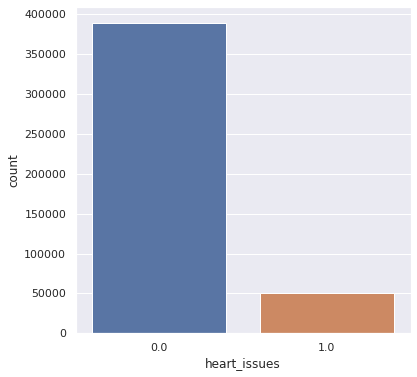

In [64]:
# Plot different 'target' counts to check class balance
# Class 1 = Heart disease detected, Class 0 = No heart disease
# We can see class imbalance as only 12.5% class 1 data
#sns.set(rc={'figure.figsize':(6,6)})
sns.countplot(df_cv['heart_issues'],label="Count")

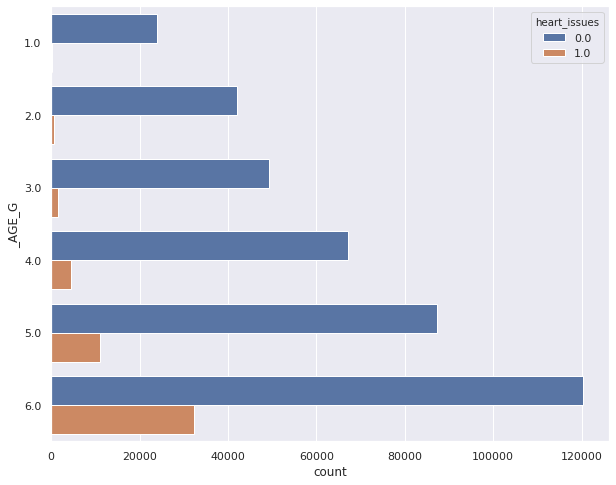

In [25]:
# Compare heart disease cases with age
pyplot.figure(figsize=(10,8))
sns.countplot(y='_AGE_G', hue='heart_issues', data=df_cv)

Above _AGE_G is categorized as below:

1: Age 18 to 24

2: Age 25 to 34

3: Age 35 to 44

4: Age 45 to 54

5: Age 55 to 64

6: Age 65 or older

### As per above graph maximum percentage of heart disease detected at 65 or older.

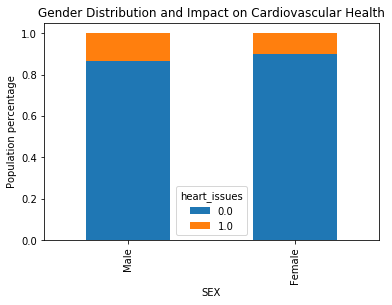

In [7]:
#plt.figure(figsize=(20,10))
#plt.figure(figsize=(10,8))
k = df_cv.groupby(['SEX','heart_issues']).size()

to_plot =k.unstack()
to_plot_transpose = to_plot.transpose()
to_plot_transpose_pct = to_plot_transpose.div(to_plot_transpose.sum())
to_plot_pct=to_plot_transpose_pct.transpose()
to_plot_pct.plot(kind='bar',stacked=True)


positions = (0, 1)
labels = ("Male", "Female")
plt.xticks(positions, labels)
plt.title("Gender Distribution and Impact on Cardiovascular Health")
plt.ylabel('Population percentage')
plt.show()

### As per above count of heart disease counts are almost same for both Males and Females but percentage of heart diseases is more for Males

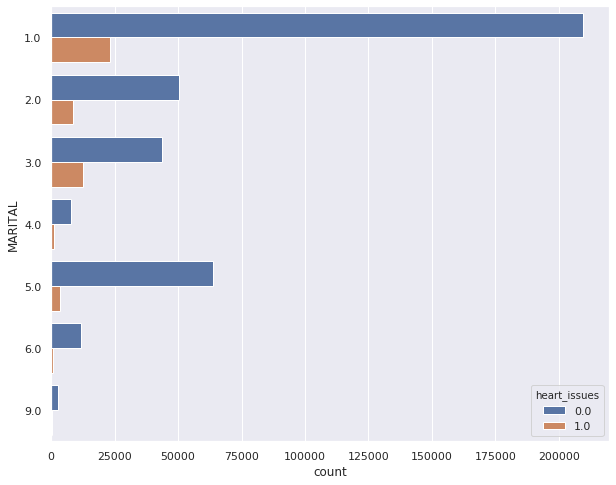

In [30]:
# Compare heart disease cases for different Marital status categories
# 1 : Married, 2 : Divorced, 3 : Widowed, 4 : Separated, 5: Never married, 6:A member of an unmarried couple
plt.figure(figsize=(10,8))
sns.countplot(y='MARITAL', hue='heart_issues', data=df_cv)

### As per above highest heart diseases percentage is observed for Widowed people (Category 3). This looks related to age factor as most of widow people of old age. Which can be seen in below graph, where Maratial Category 3 has highest percenatge of 65 and above people.

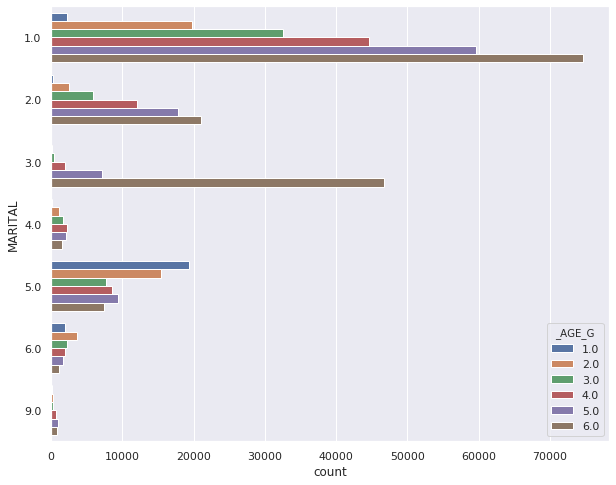

In [31]:
# Compare heart disease cases for different Marital status categories
# MARITAL = 1 :Married, 2 :Divorced, 3 :Widowed, 4:Separated, 5:Never married, 6: A member of an unmarried couple
plt.figure(figsize=(10,8))
sns.countplot(y='MARITAL', hue='_AGE_G', data=df_cv)

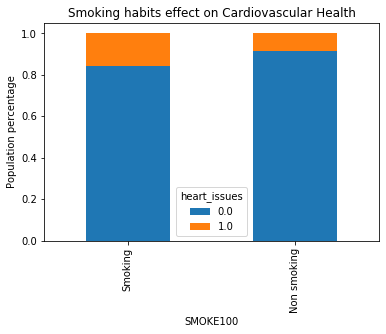

In [8]:
#plt.figure(figsize=(20,10))
#plt.figure(figsize=(10,8))
k = df_cv.groupby(['SMOKE100','heart_issues']).size()

to_plot =k.unstack()
to_plot_transpose = to_plot.transpose()
to_plot_transpose_pct = to_plot_transpose.div(to_plot_transpose.sum())
to_plot_pct=to_plot_transpose_pct.transpose()
to_plot_pct.plot(kind='bar',stacked=True)


positions = (0, 1)
labels = ("Smoking", "Non smoking")
plt.xticks(positions, labels)
plt.title("Smoking habits effect on Cardiovascular Health")
plt.ylabel('Population percentage')
plt.show()

### As per above high percentages of heart issues in smokers

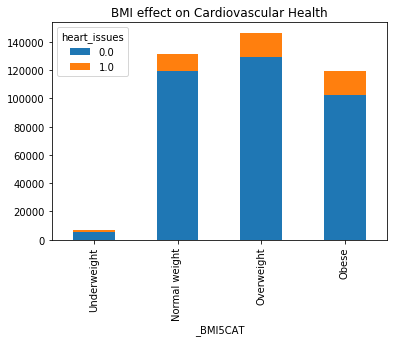

In [9]:
# Compare heart disease cases with body mass index (BMI) categories
df_cv['_BMI5CAT'].replace([0,77,99],9,inplace = True)
df_cv.groupby(['_BMI5CAT','heart_issues']).size().unstack().plot(kind='bar',stacked=True)
positions = (0,1,2,3)
labels = ("Underweight", "Normal weight","Overweight","Obese")
plt.xticks(positions, labels)
plt.title("BMI effect on Cardiovascular Health")
plt.show()

### As per above graph highest percentage of heart diseases in overweight and obese people

<Figure size 720x576 with 0 Axes>

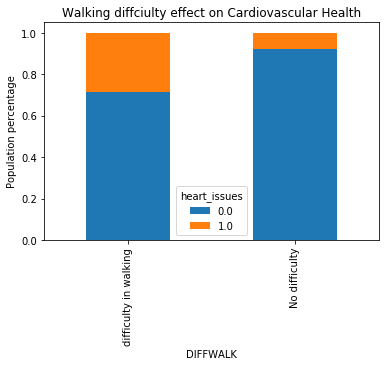

In [10]:
# Compare heart disease cases for people with or without difficulty walking or climbing stairs
# 1 : Yes feel difficulty, 2 : No difficulty

#plt.figure(figsize=(20,10))
plt.figure(figsize=(10,8))
k = df_cv.groupby(['DIFFWALK','heart_issues']).size()

to_plot =k.unstack()
to_plot_transpose = to_plot.transpose()
to_plot_transpose_pct = to_plot_transpose.div(to_plot_transpose.sum())
to_plot_pct=to_plot_transpose_pct.transpose()
to_plot_pct.plot(kind='bar',stacked=True)


positions = (0, 1)
labels = ("difficulty in walking", "No difficulty")
plt.xticks(positions, labels)
plt.title("Walking diffciulty effect on Cardiovascular Health")
plt.ylabel('Population percentage')
plt.show()

### As per above high percentages of heart issues in people with diffculty in walking

<Figure size 720x576 with 0 Axes>

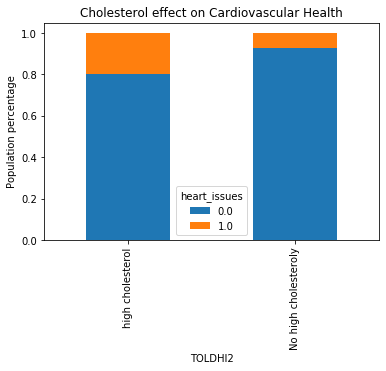

In [11]:
# Compare heart disease cases for different high blood cholesterol categories
# 1 : Yes high cholesterol, 2 : Not high cholesterol

#plt.figure(figsize=(20,10))
plt.figure(figsize=(10,8))
k = df_cv.groupby(['TOLDHI2','heart_issues']).size()

to_plot =k.unstack()
to_plot_transpose = to_plot.transpose()
to_plot_transpose_pct = to_plot_transpose.div(to_plot_transpose.sum())
to_plot_pct=to_plot_transpose_pct.transpose()
to_plot_pct.plot(kind='bar',stacked=True)


positions = (0, 1)
labels = ("high cholesterol", "No high cholesteroly")
plt.xticks(positions, labels)
plt.title("Cholesterol effect on Cardiovascular Health")
plt.ylabel('Population percentage')
plt.show()

### As expected people with high blood cholesterol has high perecentage of heart diseases

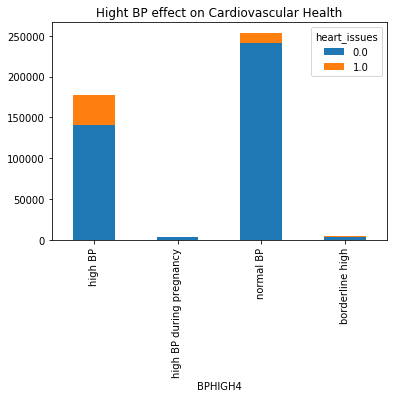

In [12]:
# Compare heart disease cases for different high blood pressure categories
# 1 : Yes, 2 : Yes, during pregnancy, 3: No, 4: Told borderline high or pre-hypertensive

df_cv['BPHIGH4'].replace([0,77,99],9,inplace = True)
df_cv.groupby(['BPHIGH4','heart_issues']).size().unstack().plot(kind='bar',stacked=True)
positions = (0,1,2,3)
labels = ("high BP", "high BP during pregnancy","normal BP","borderline high")
plt.xticks(positions, labels)
plt.title("Hight BP effect on Cardiovascular Health")
plt.show()

### As per above percentage of heart diseases more with high blood pressure people

## Models comparison and prediction

In [15]:
# Generate Test and training data set

predict_set = data_2015.loc[data_2015.heart_issues.isin([7,9])]
training_set = data_2015.loc[~data_2015.heart_issues.isin([7,9])]

In [16]:
# Generate predict and training target set

training_target = training_set[['heart_issues']]
predict_target = predict_set[['heart_issues']]

In [17]:
# Drop the target columns from the training data

training_set.drop(columns=['heart_issues'],inplace=True)
predict_set.drop(columns=['heart_issues'],inplace=True)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(training_set, training_target,shuffle = True, test_size=0.2, random_state=42)

In [19]:
# Grid Search function to determine best hyper-paramters for the model
def gridSearch_func(model,tree_parameters,score):
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(model, tree_parameters, scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

## XGBoost Algorithm

In [20]:
# Parameter selection for maodel training

model = XGBClassifier()
#tree_parameters = {'learning_rate': [0.1, 0.2, 0.01],'max_depth': [3,5,6,8],'n_estimators': [10, 20, 50, 100, 200]}
tree_parameters = {'learning_rate': [0.8, 1 , 0.5],'max_depth': [5,6,10],'n_estimators': [70,100]}
scores = ['recall']

In [21]:
# GridSearch for XGboost
# Best parameters set found on development set:{'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 100}
time_dict={}
start_time = time.time()
gridSearch_func(model,tree_parameters,scores[0])
end_time = time.time()
time_dict[f'XGBoost + gridSearchCV + {scores[0]}'] = end_time - start_time

# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'learning_rate': 1, 'max_depth': 10, 'n_estimators': 100}

Grid scores on development set:

0.595 (+/-0.004) for {'learning_rate': 0.8, 'max_depth': 5, 'n_estimators': 70}
0.596 (+/-0.005) for {'learning_rate': 0.8, 'max_depth': 5, 'n_estimators': 100}
0.596 (+/-0.002) for {'learning_rate': 0.8, 'max_depth': 6, 'n_estimators': 70}
0.598 (+/-0.003) for {'learning_rate': 0.8, 'max_depth': 6, 'n_estimators': 100}
0.603 (+/-0.005) for {'learning_rate': 0.8, 'max_depth': 10, 'n_estimators': 70}
0.606 (+/-0.005) for {'learning_rate': 0.8, 'max_depth': 10, 'n_estimators': 100}
0.597 (+/-0.003) for {'learning_rate': 1, 'max_depth': 5, 'n_estimators': 70}
0.597 (+/-0.006) for {'learning_rate': 1, 'max_depth': 5, 'n_estimators': 100}
0.599 (+/-0.003) for {'learning_rate': 1, 'max_depth': 6, 'n_estimators': 70}
0.600 (+/-0.005) for {'learning_rate': 1, 'max_depth': 6, 'n_estimators': 100}
0.606 (+/-0.004) for {'

In [85]:
# Re-train the model on the best hyper parameters

model_xgb = XGBClassifier(learning_rate= 1,max_depth= 10, n_estimators= 100)
X_train, X_test, y_train, y_test = train_test_split(training_set, training_target,shuffle = True, test_size=0.2, random_state=42)
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

<BarContainer object of 52 artists>

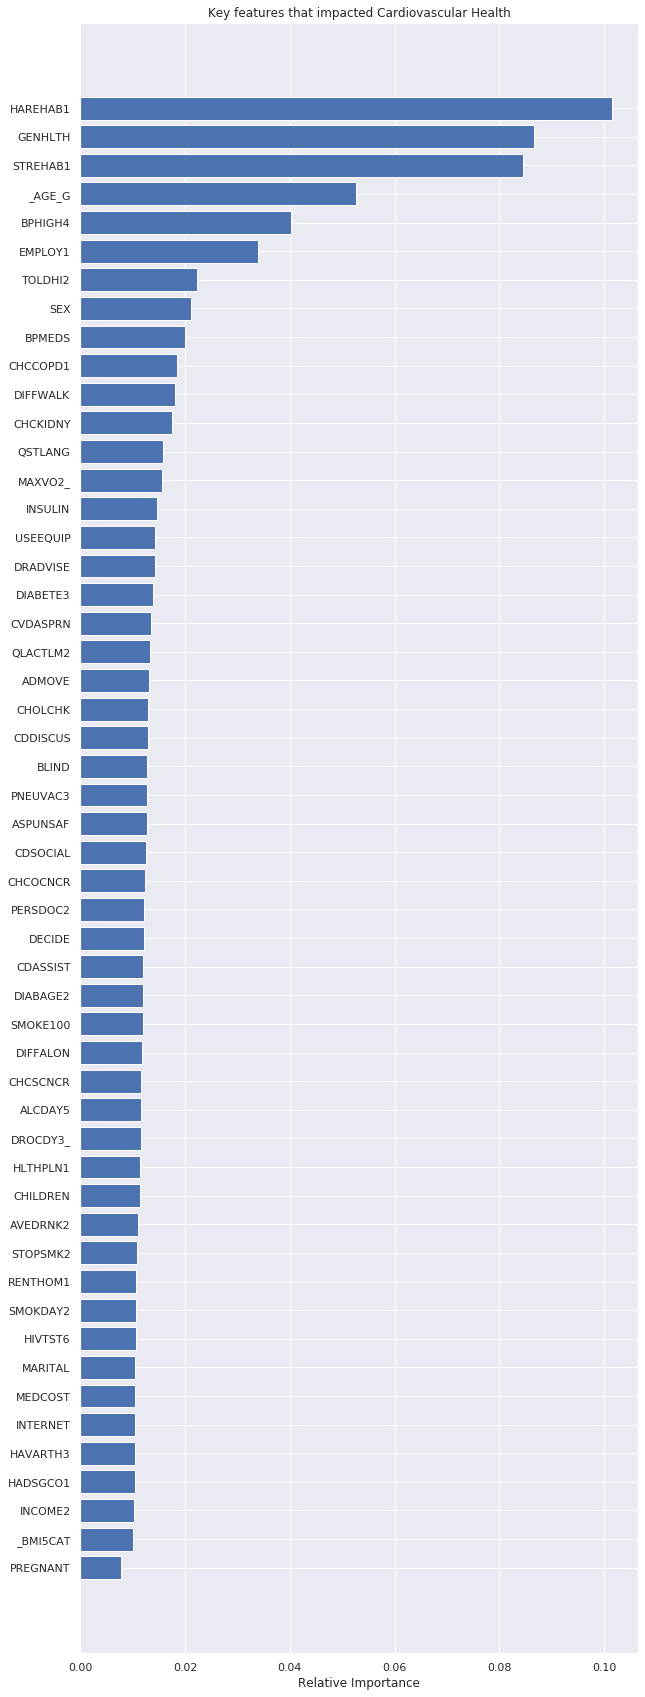

In [88]:
# Important features 

import matplotlib.pyplot as plt
sorted_idx = model_xgb.feature_importances_.argsort()
plt.figure(figsize=(10,30))
plt.title('Key features that impacted Cardiovascular Health')
plt.xlabel('Relative Importance')
plt.barh(training_set.columns[sorted_idx], model_xgb.feature_importances_[sorted_idx])

{'objective': 'binary:logistic', 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'gpu_id': -1, 'importance_type': 'gain', 'interaction_constraints': '', 'learning_rate': 1, 'max_delta_step': 0, 'max_depth': 10, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 100, 'n_jobs': 0, 'num_parallel_tree': 1, 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}
Accuracy on test data: 0.87
Accuracy on training data: 0.95


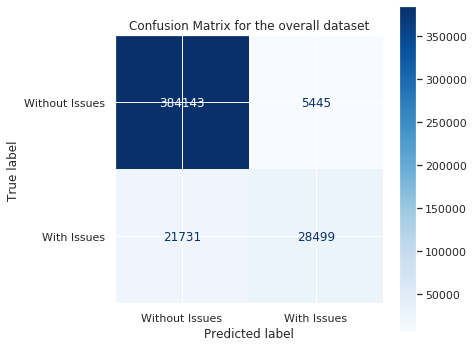

In [89]:
# Confusion matrix for the XGBoost model
print(model_xgb.get_params())
print("Accuracy on test data: {:.2f}".format(model_xgb.score(X_test, y_test)))
print("Accuracy on training data: {:.2f}".format(model_xgb.score(X_train, y_train)))
disp = plot_confusion_matrix(model_xgb, training_set, training_target,display_labels=['Without Issues',"With Issues"],cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix for the overall dataset')
plt.show()

## Random Forest Algorithm 

In [60]:
# Other tree algorithms cannot work with Nan values .Converting them to a constant
#training_set = training_set.fillna(0)
training_set = training_set.fillna(training_set.mode().iloc[0])

In [61]:

# Best parameters set found on development set: {'bootstrap': True, 'max_depth': 10, 'max_features': 18, 'n_estimators': 150}
model = RandomForestClassifier()
tree_parameters = {'bootstrap': [True],'max_depth': [10,15,20],'n_estimators': [100,150]}
#tree_parameters ={}
scores = scores = ['recall']
X_train, X_test, y_train, y_test = train_test_split(training_set, training_target,shuffle = True, test_size=0.2, random_state=42)

In [62]:
time_dict={}
start_time = time.time()
gridSearch_func(model,tree_parameters,scores[0])
end_time = time.time()
time_dict[f'RandomForestClassifier + gridSearchCV + {scores[0]}'] = end_time - start_time

# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'bootstrap': True, 'max_depth': 20, 'n_estimators': 100}

Grid scores on development set:

0.525 (+/-0.001) for {'bootstrap': True, 'max_depth': 10, 'n_estimators': 100}
0.525 (+/-0.001) for {'bootstrap': True, 'max_depth': 10, 'n_estimators': 150}
0.544 (+/-0.003) for {'bootstrap': True, 'max_depth': 15, 'n_estimators': 100}
0.544 (+/-0.001) for {'bootstrap': True, 'max_depth': 15, 'n_estimators': 150}
0.553 (+/-0.003) for {'bootstrap': True, 'max_depth': 20, 'n_estimators': 100}
0.552 (+/-0.003) for {'bootstrap': True, 'max_depth': 20, 'n_estimators': 150}

Detailed classification report:

              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94     77865
         1.0       0.62      0.12      0.20     10099

    accuracy                           0.89     87964
   macro avg       0.76      0.56      0.57     87964
weighted avg       0.87      0.89      0.86

In [77]:
# Re-train the model on the best hyper parameters

model_rf = RandomForestClassifier(bootstrap= True,max_depth= 20, n_estimators= 100)
X_train, X_test, y_train, y_test = train_test_split(training_set, training_target,shuffle = True, test_size=0.2, random_state=42)
model_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=20)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Accuracy on test data: 0.89
Accuracy on training data: 0.94


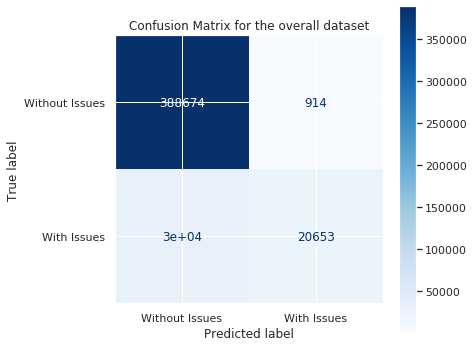

In [78]:
print(model_rf.get_params())
print("Accuracy on test data: {:.2f}".format(model_rf.score(X_test, y_test)))
print("Accuracy on training data: {:.2f}".format(model_rf.score(X_train, y_train)))
disp = plot_confusion_matrix(model_rf, training_set, training_target,display_labels=['Without Issues',"With Issues"],cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix for the overall dataset')
plt.show()

## Decision Tree Algorithm 

In [69]:
model = tree.DecisionTreeClassifier()
tree_parameters = [{'splitter': ['best', 'random'],'max_depth': [15,10,20],'criterion': ['gini', 'entropy']}]
scores = ['f1']

In [70]:
# Best parameters set found on development set: {'criterion': 'gini', 'max_depth': 10, 'splitter': 'best'}

time_dict={}
start_time = time.time()
gridSearch_func(model,tree_parameters,scores[0])
end_time = time.time()
time_dict[f'DecisionTreeClassifier + gridSearchCV + {scores[0]}'] = end_time - start_time

# Tuning hyper-parameters for f1

Best parameters set found on development set:

{'criterion': 'gini', 'max_depth': 20, 'splitter': 'best'}

Grid scores on development set:

0.599 (+/-0.005) for {'criterion': 'gini', 'max_depth': 15, 'splitter': 'best'}
0.583 (+/-0.014) for {'criterion': 'gini', 'max_depth': 15, 'splitter': 'random'}
0.581 (+/-0.009) for {'criterion': 'gini', 'max_depth': 10, 'splitter': 'best'}
0.555 (+/-0.022) for {'criterion': 'gini', 'max_depth': 10, 'splitter': 'random'}
0.606 (+/-0.007) for {'criterion': 'gini', 'max_depth': 20, 'splitter': 'best'}
0.597 (+/-0.009) for {'criterion': 'gini', 'max_depth': 20, 'splitter': 'random'}
0.598 (+/-0.011) for {'criterion': 'entropy', 'max_depth': 15, 'splitter': 'best'}
0.580 (+/-0.016) for {'criterion': 'entropy', 'max_depth': 15, 'splitter': 'random'}
0.576 (+/-0.009) for {'criterion': 'entropy', 'max_depth': 10, 'splitter': 'best'}
0.559 (+/-0.029) for {'criterion': 'entropy', 'max_depth': 10, 'splitter': 'random'}
0.60

In [80]:
# Re-train the model on the best hyper parameters

model_dt = tree.DecisionTreeClassifier(criterion='gini', max_depth = 15, splitter = 'best')
X_train, X_test, y_train, y_test = train_test_split(training_set, training_target,shuffle = True, test_size=0.2, random_state=42)
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=15)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 15, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}
Accuracy on test data: 0.88
Accuracy on training data: 0.91


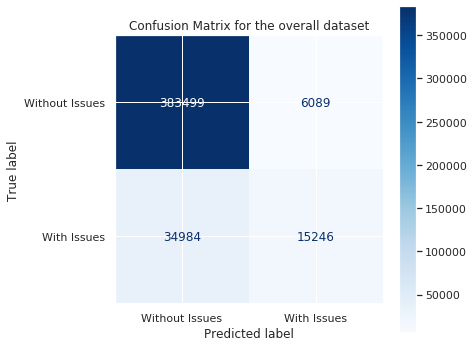

In [81]:
print(model_dt.get_params())
print("Accuracy on test data: {:.2f}".format(model_dt.score(X_test, y_test)))
print("Accuracy on training data: {:.2f}".format(model_dt.score(X_train, y_train)))
disp = plot_confusion_matrix(model_dt, training_set, training_target,display_labels=['Without Issues',"With Issues"],cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix for the overall dataset')
plt.show()

## Logistic Regression 

In [82]:
from sklearn.linear_model import LogisticRegression
model_lr=LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [83]:
y_pred=model_lr.predict(X_test)

In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94     77865
         1.0       0.28      0.03      0.05     10099

    accuracy                           0.88     87964
   macro avg       0.59      0.51      0.49     87964
weighted avg       0.82      0.88      0.83     87964



### Final model selection
1. Based on the observations from all the three algorithms, it was seen that the XGBoost algorithm had the highest accuracy on test data i.e. 0.75 closely followed by Random forest which was at 0.74.
2. But as can be seen from the confusion matrix accuracy of XGBoost on the training set is 0.76 as compared to 1 for Random Forest. So though clearly overfitting, the model overall prediction is quite better than XGBoost.

## Results on Prediction set (XGBoost)

In [96]:
print(model_xgb.get_params())
print("Accuracy on test data: {:.2f}".format(model_xgb.score(training_set,training_target)))
predict_set = predict_set.fillna(0)
y_pred = model_xgb.predict(predict_set)
predict = pd.DataFrame(data=y_pred, columns=["Predicted_xgboost"])

{'objective': 'binary:logistic', 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'gpu_id': -1, 'importance_type': 'gain', 'interaction_constraints': '', 'learning_rate': 1, 'max_delta_step': 0, 'max_depth': 10, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 100, 'n_jobs': 0, 'num_parallel_tree': 1, 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}
Accuracy on test data: 0.94


In [94]:
predict.head()

,Predicted_xgboostt
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


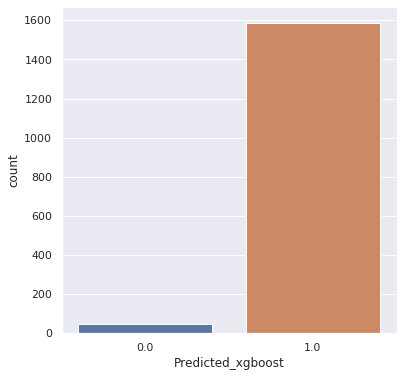

In [97]:
sns.set(rc={'figure.figsize':(6,6)})
sns.countplot(predict["Predicted_xgboost"],label="Count")